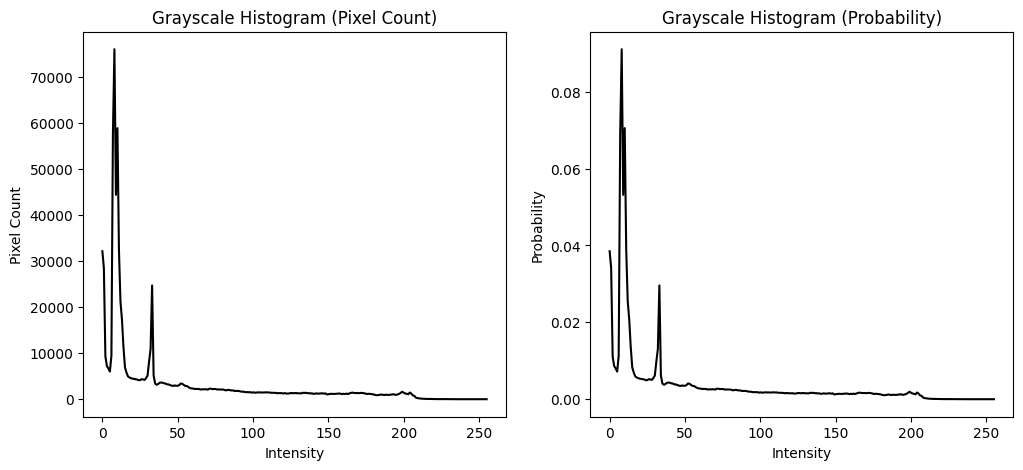

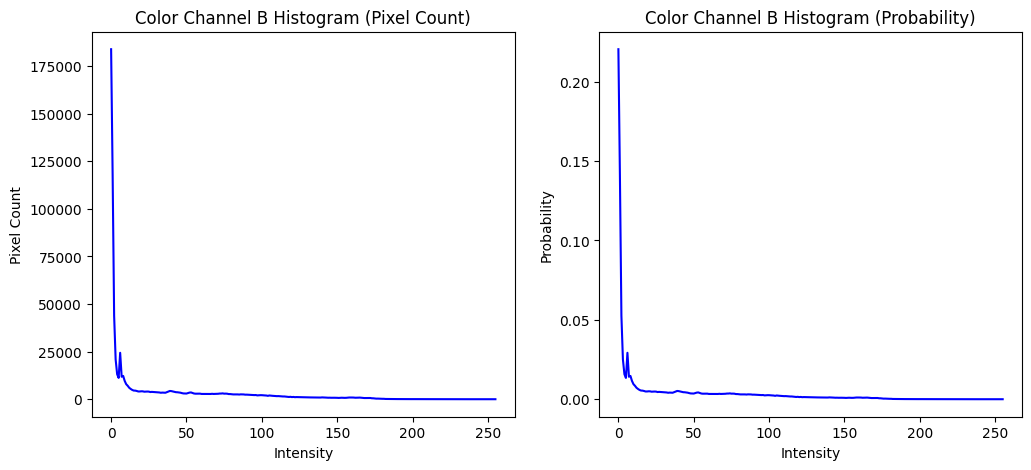

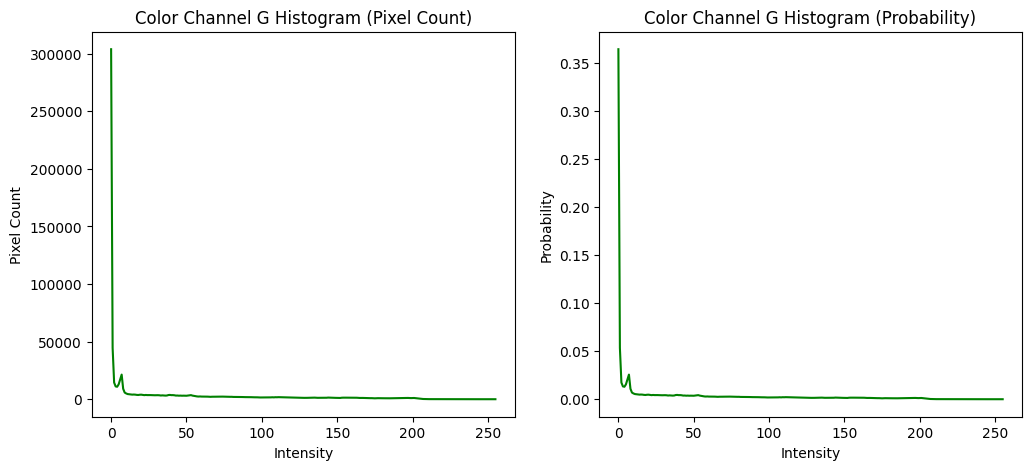

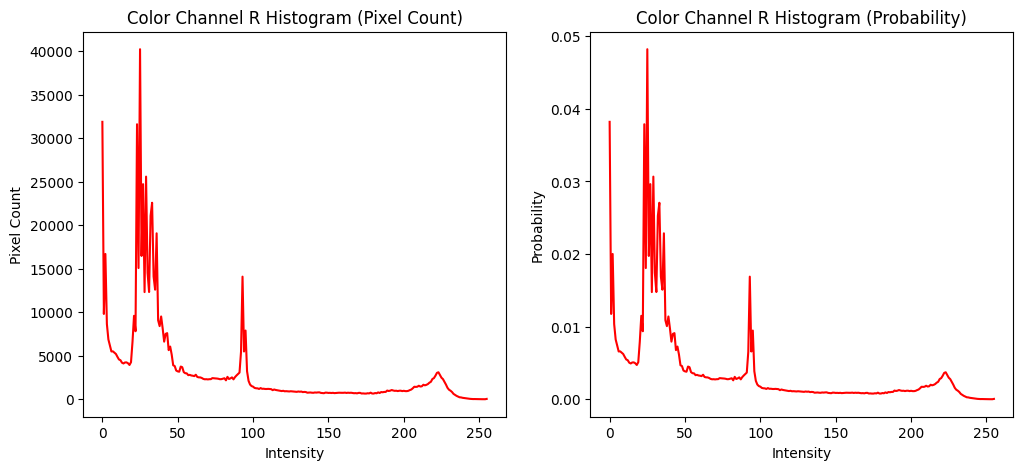

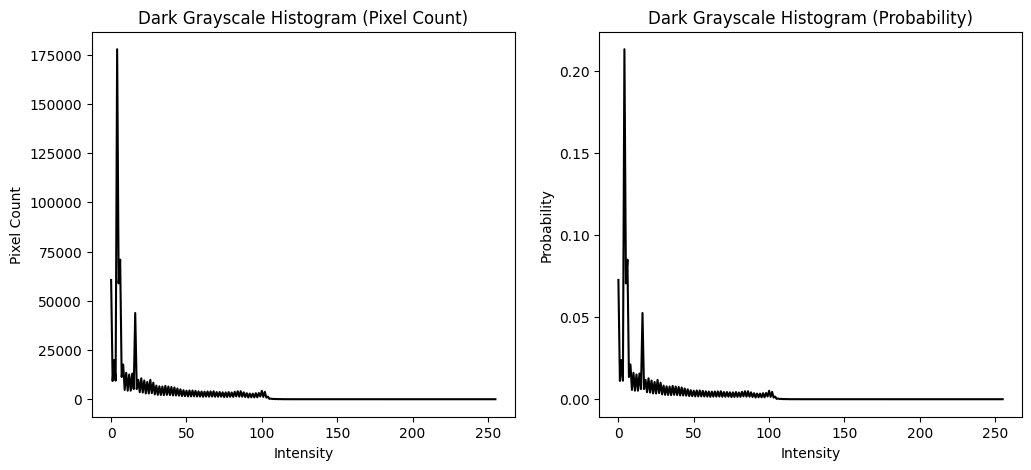

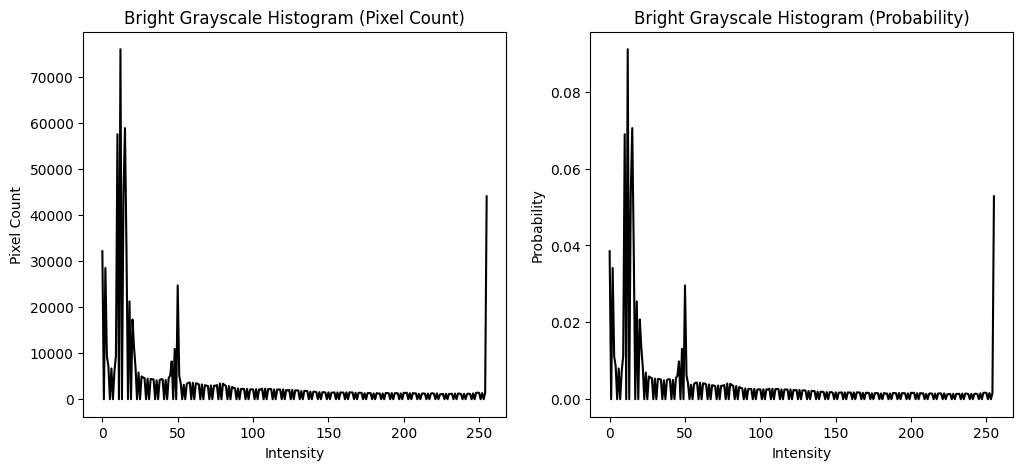

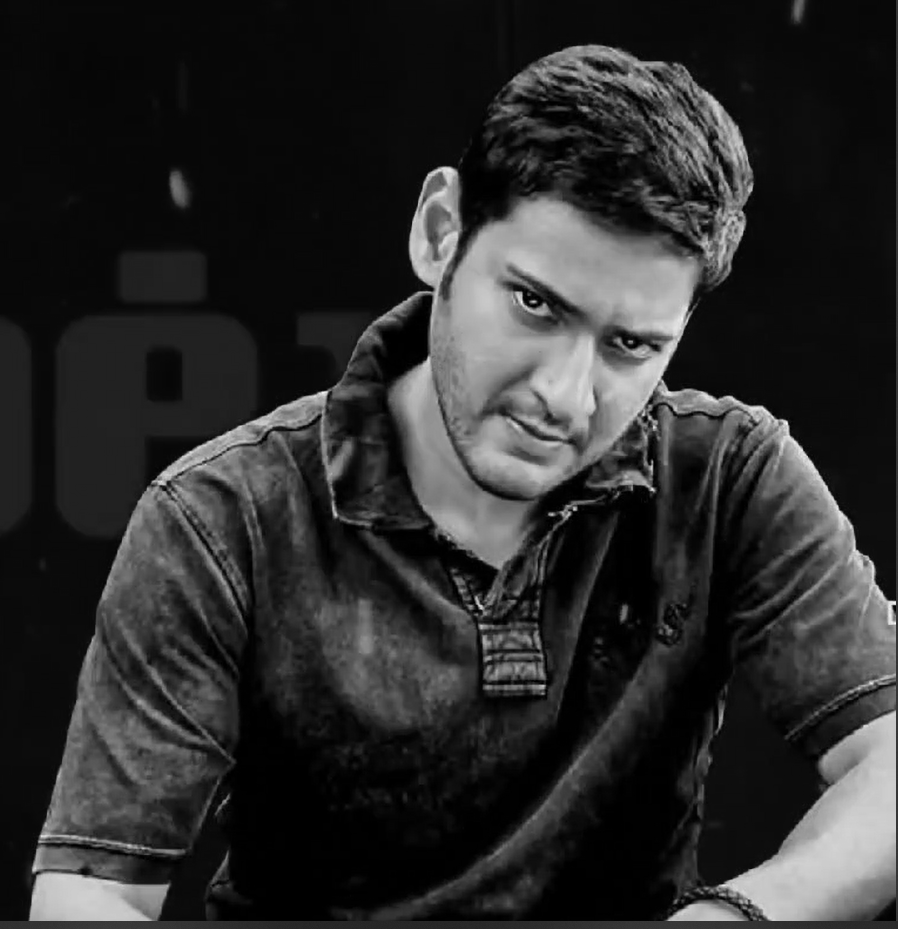

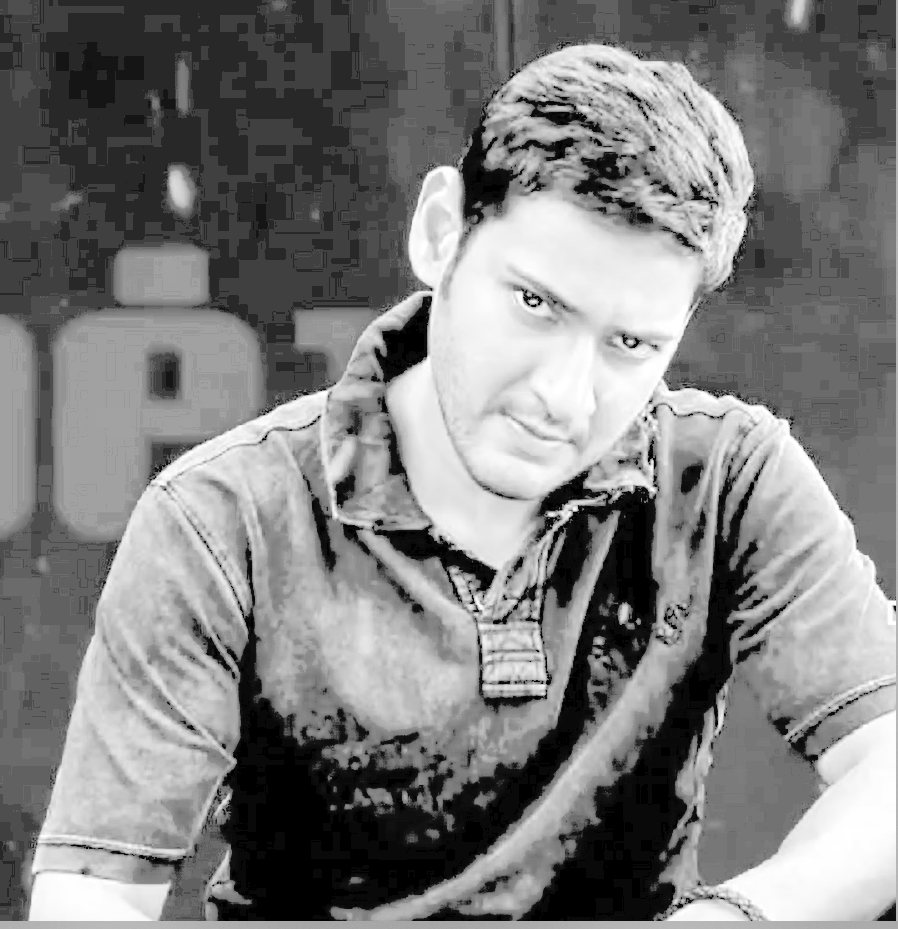

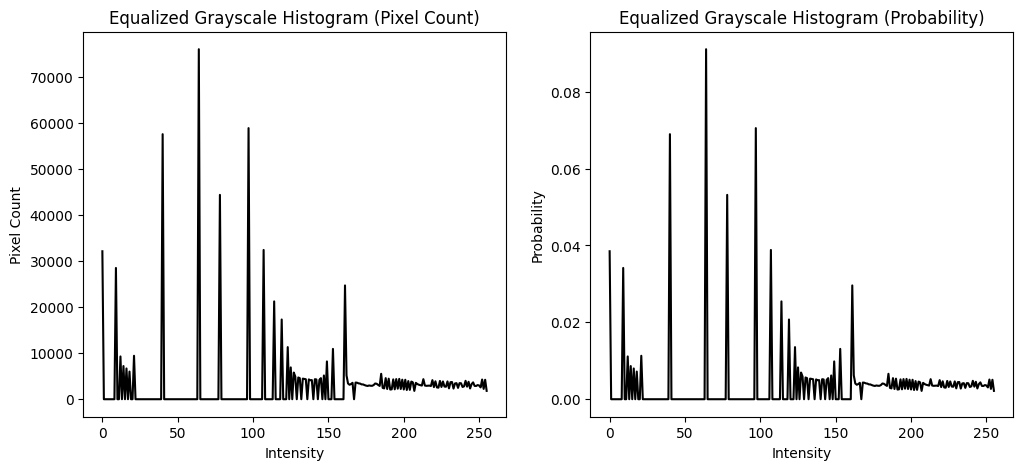

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("/content/Screenshot 2025-02-04 112416.png")

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function to compute and plot histograms
def plot_histogram(image, title, color='k'):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Normalized histogram (Probability of occurrence)
    hist_prob = hist / hist.sum()

    plt.figure(figsize=(12, 5))

    # Method 1: Intensity vs Pixel Count
    plt.subplot(1, 2, 1)
    plt.plot(hist, color=color)
    plt.title(title + " Histogram (Pixel Count)")
    plt.xlabel("Intensity")
    plt.ylabel("Pixel Count")

    # Method 2: Intensity vs Probability
    plt.subplot(1, 2, 2)
    plt.plot(hist_prob, color=color)
    plt.title(title + " Histogram (Probability)")
    plt.xlabel("Intensity")
    plt.ylabel("Probability")

    plt.show()

# Compute and visualize histogram for grayscale image
plot_histogram(gray_image, "Grayscale")

# Process color channels separately
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    plot_histogram(image[:, :, i], f"Color Channel {col.upper()}", color=col)

# Create dark and bright versions of the grayscale image
dark_image = cv2.addWeighted(gray_image, 0.5, np.zeros_like(gray_image), 0, 0)
bright_image = cv2.addWeighted(gray_image, 1.5, np.zeros_like(gray_image), 0, 0)

# Display histogram for dark and bright images
plot_histogram(dark_image, "Dark Grayscale")
plot_histogram(bright_image, "Bright Grayscale")

# Apply histogram equalization for contrast enhancement
equalized_image = cv2.equalizeHist(gray_image)

# Display images in Colab
cv2_imshow(gray_image)  # Show original grayscale image
cv2_imshow(equalized_image)  # Show equalized grayscale image
cv2.waitKey(0)
cv2.destroyAllWindows()

# Compare histograms before and after equalization
plot_histogram(equalized_image, "Equalized Grayscale")


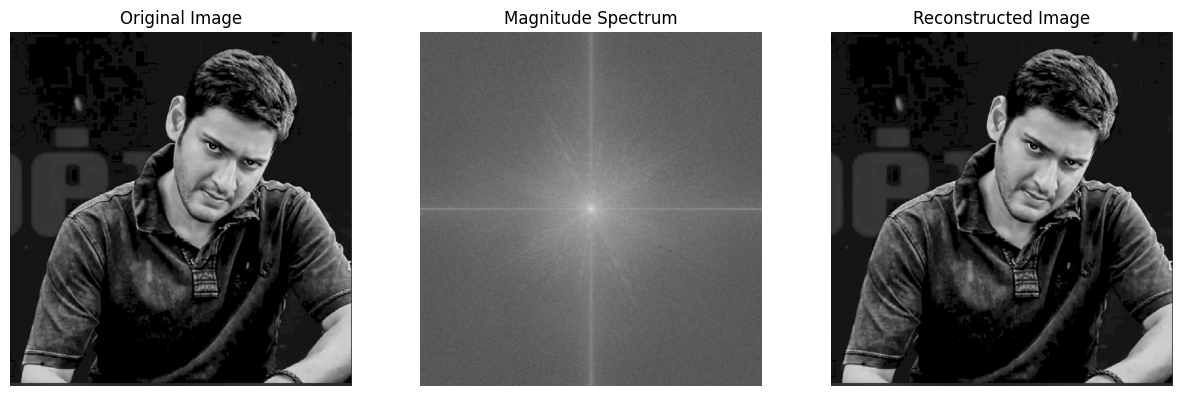

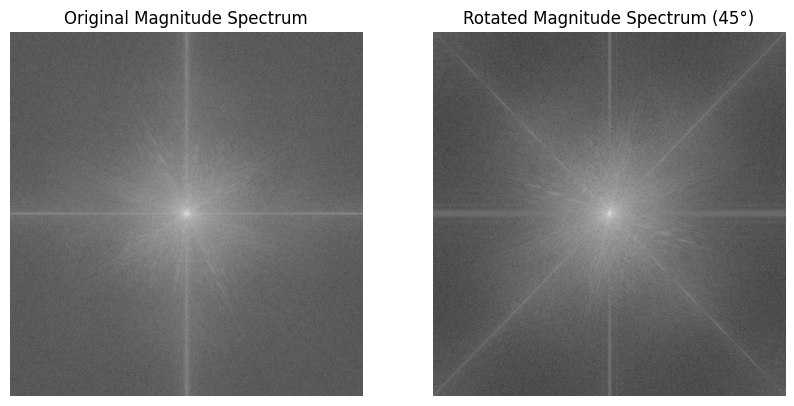

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("/content/Screenshot 2025-02-04 112416.png", cv2.IMREAD_GRAYSCALE)

# Compute the DFT using FFT
def compute_fft(image):
    dft = np.fft.fft2(image)  # Compute FFT
    dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to center
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)  # Compute magnitude spectrum
    return dft, dft_shift, magnitude_spectrum

dft, dft_shift, magnitude_spectrum = compute_fft(image)

# Reconstruct image using IFFT
def compute_ifft(dft_shift):
    dft_ishift = np.fft.ifftshift(dft_shift)  # Inverse shift
    img_reconstructed = np.fft.ifft2(dft_ishift).real  # Compute IFFT
    return img_reconstructed

img_reconstructed = compute_ifft(dft_shift)

# Display original, magnitude spectrum, and reconstructed images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_reconstructed, cmap="gray")
plt.title("Reconstructed Image")
plt.axis("off")




plt.show()

# Rotate the image by 45 degrees
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)  # Rotation matrix
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

rotated_image = rotate_image(image, 45)

# Compute FFT of rotated image
_, rotated_dft_shift, rotated_magnitude_spectrum = compute_fft(rotated_image)

# Display original magnitude spectrum vs rotated magnitude spectrum
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Original Magnitude Spectrum")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rotated_magnitude_spectrum, cmap="gray")
plt.title("Rotated Magnitude Spectrum (45°)")
plt.axis("off")

plt.show()
